In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('spam.csv',encoding='utf-8',encoding_errors='ignore')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [17]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# Drop last 3 columns 

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Renaming columns 

df.rename(columns={'v1':'target' , 'v2' : 'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Encoding target values 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
 

In [23]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# Missing Values

df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
# Duplicate Values 
df.duplicated().sum()

404

In [26]:
df = df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(5168, 2)

In [30]:
# EDA
df['target'].value_counts()

0    4516
1     652
Name: target, dtype: int64

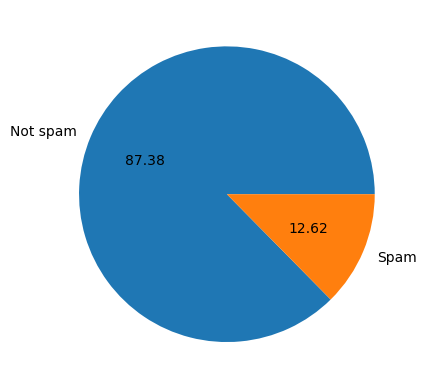

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['Not spam','Spam'], autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vallabhpatil777/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['count_char'] = df['text'].apply(len)
df.head()

,target,text,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# Number of words
# Tokenization
df['count_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,count_char,count_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['count_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,count_char,count_words,count_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['count_char', 'count_words','count_sentences']].describe()

,count_char,count_words,count_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
# Not spam
df[df['target'] == 0][['count_char', 'count_words','count_sentences']].describe()

,count_char,count_words,count_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
# spam
df[df['target'] == 1][['count_char', 'count_words','count_sentences']].describe()

,count_char,count_words,count_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [44]:
import seaborn as sns

<Axes: xlabel='count_char', ylabel='Count'>

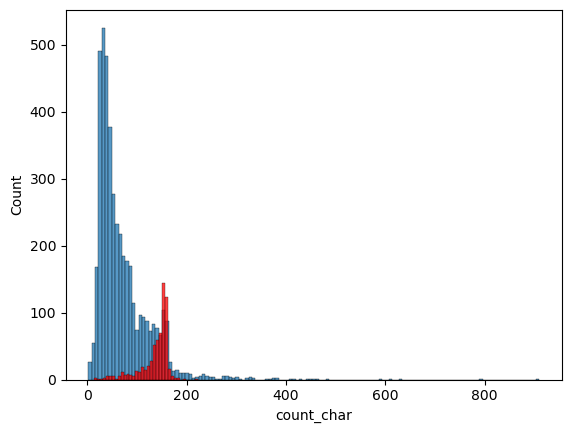

In [47]:
sns.histplot(df[df['target']==0]['count_char'])
sns.histplot(df[df['target']==1]['count_char'],color='red')

<Axes: xlabel='count_words', ylabel='Count'>

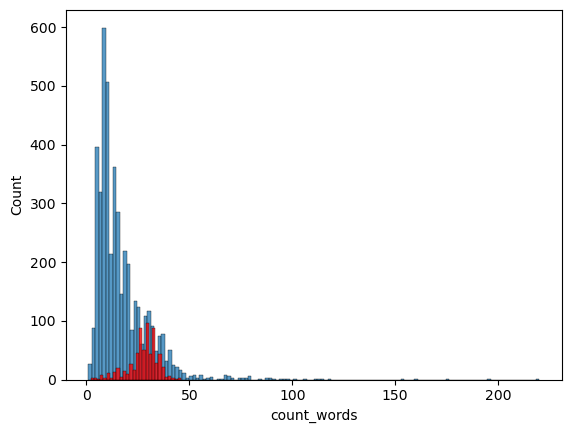

In [48]:
sns.histplot(df[df['target']==0]['count_words'])
sns.histplot(df[df['target']==1]['count_words'],color='red')

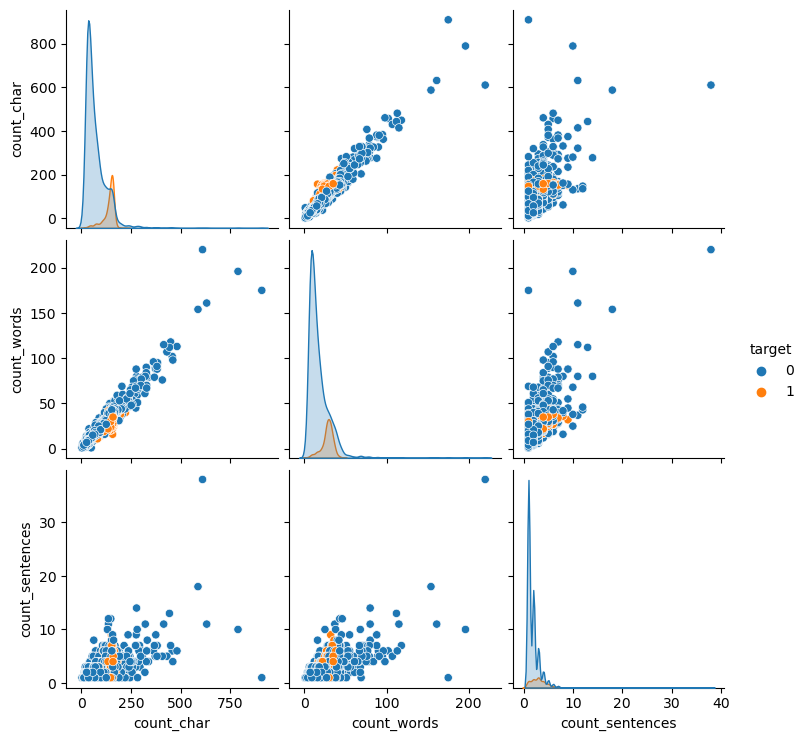

In [49]:
sns.pairplot(df,hue='target')

/var/folders/4n/z26wg13x3t58xfzjftcmtswh0000gn/T/ipykernel_36743/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

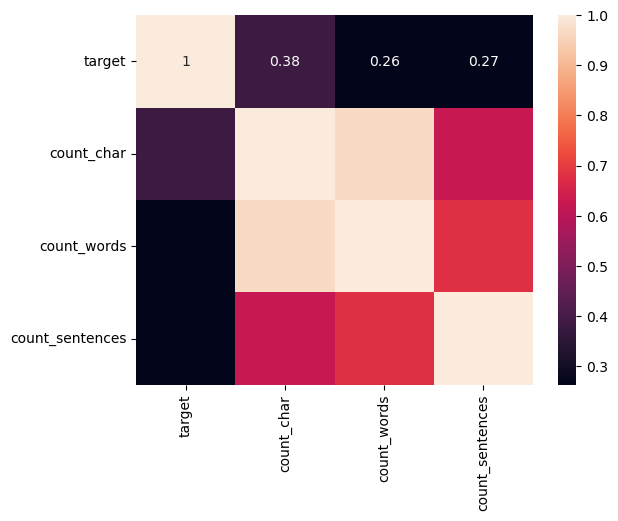

In [53]:
sns.heatmap(df.corr(),annot=True)

In [60]:
from nltk.corpus import stopwords
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [61]:
# Data preprocessing

def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    list = []
    for i in text:
        if i.isalnum():
            list.append(i)
    text = list[:]
    list.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            list.append(i)
    text = list[:]
    list.clear()
    for i in text:
        list.append(ps.stem(i))
    
    return " ".join(list)

In [58]:
transform_text(df['text'][0])

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [62]:
df['processed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,count_char,count_words,count_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [66]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


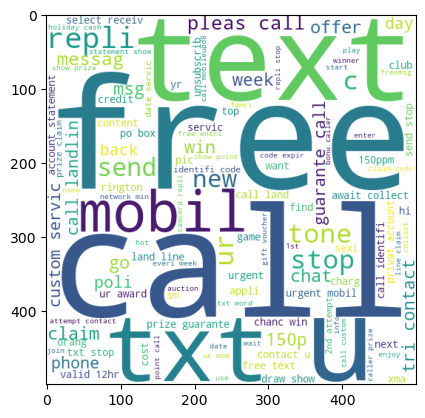

In [68]:
spam_wc = wc.generate(df[df['target']==1]['processed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

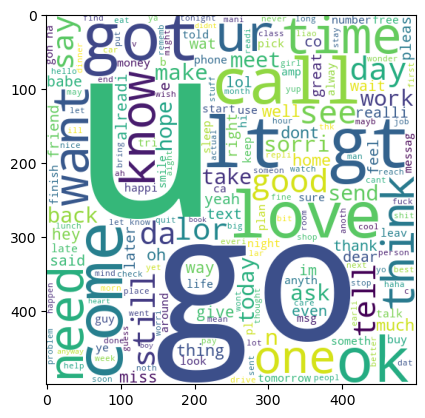

In [69]:
notspam_wc = wc.generate(df[df['target']==0]['processed_text'].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [70]:
spam_corpus=[]
for msg in df[df['target']==1]['processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

10106

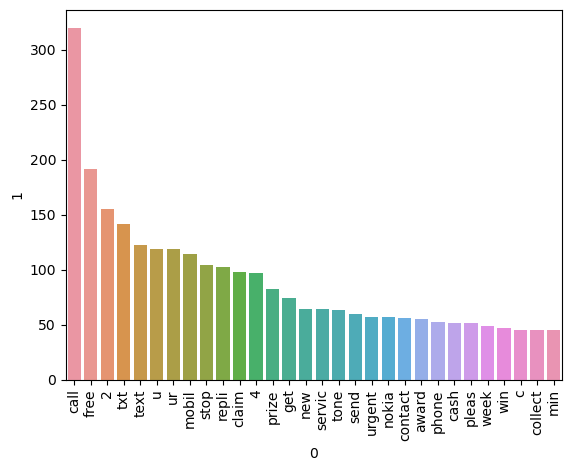

In [72]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
notspam_corpus=[]
for msg in df[df['target']==0]['processed_text'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)

len(notspam_corpus)

35380

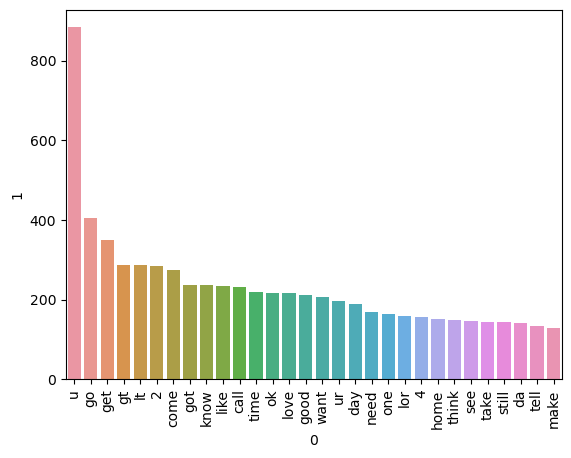

In [75]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(notspam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(notspam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [146]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [147]:
X = tfidf.fit_transform(df['processed_text']).toarray()

In [148]:
X.shape

(5168, 3000)

In [149]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8730650154798761
[[995 131]
 [ 33 133]]
0.5037878787878788


In [155]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9713622291021672
[[1126    0]
 [  37  129]]
1.0


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9814241486068112
[[1124    2]
 [  22  144]]
0.9863013698630136


In [127]:
# MNB --> tfidf


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [129]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [130]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [131]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [132]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9744582043343654, 0.9716312056737588)

In [133]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9744582043343654
Precision -  0.9716312056737588
For  NB
Accuracy -  0.9713622291021672
Precision -  1.0
For  DT
Accuracy -  0.9318885448916409
Precision -  0.8305084745762712
For  LR
Accuracy -  0.9535603715170279
Precision -  0.9416666666666667
For  RF
Accuracy -  0.9713622291021672
Precision -  0.9849624060150376


/Users/vallabhpatil777/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9651702786377709
Precision -  0.9548872180451128
For  BgC
Accuracy -  0.9597523219814241
Precision -  0.8701298701298701
For  ETC
Accuracy -  0.978328173374613
Precision -  0.9726027397260274
For  GBDT
Accuracy -  0.9504643962848297
Precision -  0.9473684210526315
For  xgb
Accuracy -  0.9698142414860681
Precision -  0.9568345323741008


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.952012,1.000000
7,ETC,0.972136,0.985075
4,RF,0.971362,0.984962
0,SVC,0.974458,0.971631
9,xgb,0.967492,0.930556
3,LR,0.948916,0.923729
5,AdaBoost,0.958204,0.917910
8,GBDT,0.948916,0.909836
6,BgC,0.958978,0.859873
2,DT,0.928019,0.801653


In [ ]:
# Further improvements
# max_features set to 3000

In [134]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [135]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [136]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.952012,1.000000,0.971362,1.000000
1,ETC,0.972136,0.985075,0.978328,0.972603
2,RF,0.971362,0.984962,0.971362,0.984962
3,SVC,0.974458,0.971631,0.974458,0.971631
4,xgb,0.967492,0.930556,0.969814,0.956835
5,LR,0.948916,0.923729,0.953560,0.941667
6,AdaBoost,0.958204,0.917910,0.965170,0.954887
7,GBDT,0.948916,0.909836,0.950464,0.947368
8,BgC,0.958978,0.859873,0.959752,0.870130
9,DT,0.928019,0.801653,0.931889,0.830508


In [137]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [138]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [139]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [140]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806501547987616
Precision 0.9862068965517241


In [141]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [142]:
from sklearn.ensemble import StackingClassifier


In [143]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [144]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9852941176470589
Precision 0.9803921568627451


In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))